In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
#axis x = movies, axis y = users
Y = pd.read_excel('ratings_movies.xlsx')
R = Y.clip(0, 1)

Y = Y.to_numpy()
R = R.to_numpy()

print ('Y.shape=', Y.shape)
print ('Y[:5] =\n',Y[:5])
print ('\nUnique values of Y:\n',set(Y.ravel()))

print ('R.shape=', R.shape)
print ('R[:5] =\n',R[:5])
print ('\nUnique values of R:\n',set(R.ravel()))

Y.shape= (14, 15)
Y[:5] =
 [[5 5 5 1 1 1 1 1 1 5 5 5 2 2 2]
 [5 5 5 1 1 1 1 1 1 5 5 5 2 2 2]
 [3 3 3 5 5 5 1 1 1 5 5 5 1 1 1]
 [3 3 3 5 5 5 1 1 1 5 5 5 1 1 1]
 [3 3 3 5 5 5 1 1 1 5 5 5 1 1 1]]

Unique values of Y:
 {1, 2, 3, 4, 5}
R.shape= (14, 15)
R[:5] =
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]

Unique values of R:
 {1}


In [13]:
def J (Y, R, X,Theta, lambd): 
    '''
    params: 1d vector  of X and Theta 
    :return expression for cost function 
    '''
    
    assert(X.shape[1]==Theta.shape[0])
    h= X @ Theta 


    try: 
        assert(h.shape ==Y.shape)
    except:
        print ('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape) )

    J= 1/2 * np.sum(((h-Y)*R) **2) + lambd/2 * np.sum(X**2) + lambd/2 * np.sum(Theta**2)

    try: 
        assert(len(J.shape)== 0)
    except:
        print ('J is not raw number. J.shape = ', J.shape)
    
    return J

In [14]:
def J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd): 
    
    cost_matr= (X @ Theta - Y) * R #  n_movies * n_users 

    X_grad= cost_matr @ Theta.T 
    Theta_grad= (cost_matr.T @ X).T
    
    try: 
        assert(X_grad.shape ==X.shape)
        assert(Theta_grad.shape ==Theta.shape)
    except:
        print ('Check gradient calculus')

    # Regularization part :          
    X_grad  += lambd * X
    Theta_grad += lambd * Theta

    
    return X_grad, Theta_grad

In [15]:
def fit(Y,R, num_features= 10,  alpha=0.0001, lambd= .01, eps= .1,  max_iter=1000,step=100, verbose=0):    
    num_movies,num_users =Y.shape
    
    
    if verbose: 
        print ('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))
        

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn( num_features, num_users)
    
    J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True # flag to continue next iter (grad desc step)
    iter_number =0 # used for limit by max_iter

    while continue_iter:            
        # Do step of gradient descent    
        X_grad, Theta_grad =  J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd)
        X= X- alpha  *X_grad        
        Theta= Theta- alpha  *Theta_grad

        # keep history of J values
        J_hist.append(J(Y, R, X,Theta, lambd))
        # check criteria of exit (finish grad desc)
        if iter_number> max_iter: # if limit succeeded
            continue_iter = False
            print ('iter_number> max_iter')
        elif np.abs(J_hist[iter_number-1] - J_hist[iter_number])< eps: # if accuracy is succeeded
            continue_iter = False
            print ('J_hist[iter_number]={}'.format(J_hist[iter_number]))
        iter_number += 1
        
        if verbose and iter_number%step ==0:
            print ('{}: {}'.format(iter_number, J_hist[iter_number-1]))
    
    return X,Theta, J_hist

In [16]:
X,Theta, J_hist = fit(Y,R, alpha=0.001, lambd= 1,max_iter= 2000, verbose=1)

Running gradient descent with alpha= 0.001, lambda= 1, eps= 0.1, max_iter= 2000
100: 153.06601726137586
200: 113.77759257131022
300: 97.91361722751296
J_hist[iter_number]=95.34786595828058


In [17]:
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

<IPython.core.display.Javascript object>


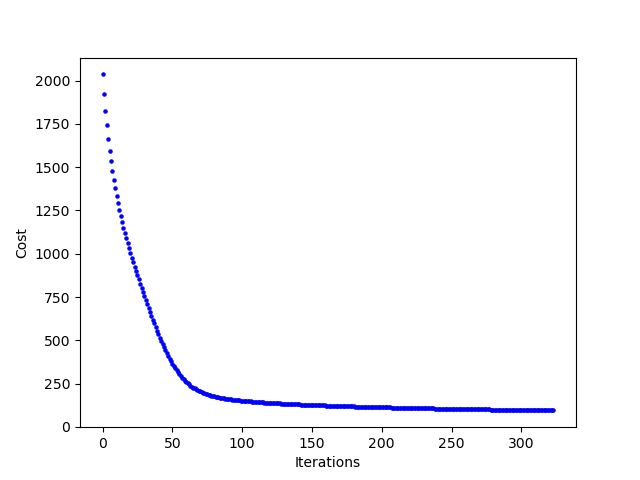

In [18]:
draw_cost_changes(J_hist)

In [20]:
pred = X@ Theta
pred[:5]

array([[4.63858174, 4.90537113, 4.99310948, 1.59897228, 1.5222367 ,
        1.42524176, 0.95580142, 1.44991145, 1.2318524 , 4.54114733,
        4.1915626 , 4.4425704 , 1.91385192, 1.80693615, 1.90416577],
       [4.45348058, 4.59454643, 4.83375629, 2.0404902 , 1.42647287,
        1.17151326, 0.83134271, 1.14574954, 0.82402115, 4.99603866,
        4.35772942, 4.6220196 , 1.8569387 , 1.76606726, 2.00129267],
       [3.15987051, 3.39191199, 3.1843778 , 4.47544669, 4.6832613 ,
        4.8931327 , 1.32159029, 1.16430601, 1.39445548, 4.54479057,
        4.79736082, 4.784776  , 0.81034295, 0.92671151, 0.59715534],
       [3.45186777, 3.19960875, 3.1565199 , 4.28253994, 4.51394533,
        4.90571992, 1.52440464, 1.35162661, 1.22844528, 4.24088008,
        4.77197766, 5.00932803, 1.02594498, 1.19663857, 0.89282402],
       [3.24335471, 3.08428973, 3.06458296, 4.60991131, 4.48439491,
        4.70881532, 1.23054727, 0.99360936, 1.07493192, 4.77844718,
        4.96916903, 5.02180561, 0.92519929, 

In [21]:
diff_train = (pred-Y)*R
# avoid those valueswhere R = 0 
diff_train_proivided = diff_train.ravel()[np.where(diff_train.ravel()!=0)]
print ('Training:', np.abs(diff_train_proivided).max(), np.abs(diff_train_proivided).mean())

Training: 1.0404902036084436 0.2467442623400123


<IPython.core.display.Javascript object>


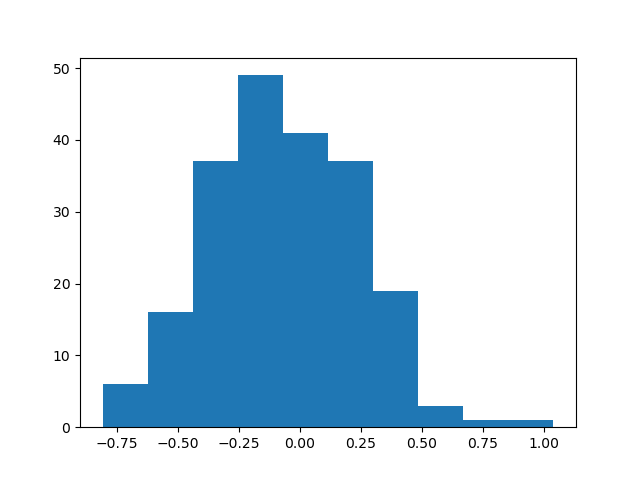

(array([ 6., 16., 37., 49., 41., 37., 19.,  3.,  1.,  1.]),
 array([-0.8084374 , -0.62354464, -0.43865188, -0.25375912, -0.06886636,
         0.1160264 ,  0.30091916,  0.48581192,  0.67070468,  0.85559744,
         1.0404902 ]),
 <BarContainer object of 10 artists>)

In [22]:
 plt.figure()
plt.hist(diff_train_proivided.ravel())

In [25]:
def build_my_raitings():
    my_ratings = np.zeros((len(Y), 1))

    my_ratings[0] = 1
    my_ratings[2] = 2
    my_ratings[5] = 5
    my_ratings[6]= 5
    my_ratings[7] = 3
    my_ratings[13]= 4
    return my_ratings

my_ratings= build_my_raitings()

print ('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Rated {int(my_ratings[i][0])} for movie №{i}\n')
Y.shape



New user ratings:

Rated 1 for movie №0

Rated 2 for movie №2

Rated 5 for movie №5

Rated 5 for movie №6

Rated 3 for movie №7

Rated 4 for movie №13



(14, 15)

In [26]:
def add_my_ratings(Y,R,my_ratings):
    Y = np.c_[my_ratings,Y]
    R = np.c_[my_ratings !=0 , R]
    return Y, R 
        
# Y,R= get_data()    
my_ratings= build_my_raitings()
Y, R = add_my_ratings(Y,R,my_ratings)
Y.shape,  R.shape

((14, 16), (14, 16))

Running gradient descent with alpha= 0.001, lambda= 1, eps= 0.1, max_iter= 2000
100: 160.47699293015492
200: 121.11445352916317
300: 105.01133805525673
J_hist[iter_number]=101.8950965987725


<IPython.core.display.Javascript object>


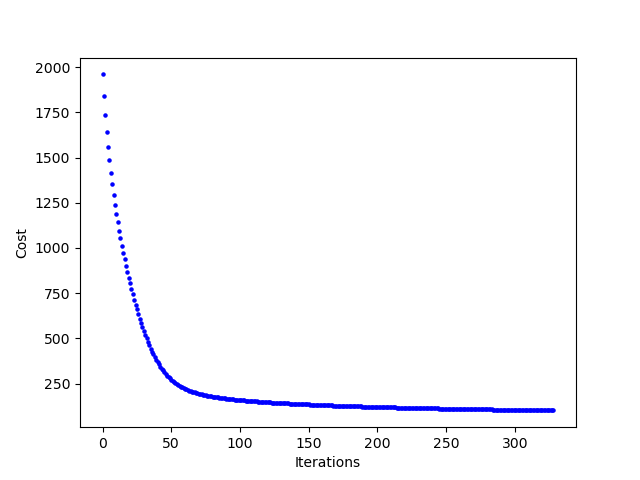

In [27]:
X,Theta, J_hist= fit(Y , R, alpha=0.001, lambd= 1,max_iter= 2000, eps= .1, step = 100, verbose=1)
draw_cost_changes(J_hist)

In [32]:
pred= X @ Theta
my_pred = pred[:,0]
print(my_pred.shape)
top_pred= np.argsort(my_pred)[::-1]
print('\nTop recommendations for you:\n')
for i in range(5):
    j = top_pred[i]
    print(f'Predicting rating {my_pred[j]} for movie №{j}\n')

(14,)

Top recommendations for you:

Predicting rating 4.857825988248307 for movie №6

Predicting rating 4.305935477070918 for movie №5

Predicting rating 4.2659329421843575 for movie №9

Predicting rating 4.023241225118661 for movie №3

Predicting rating 3.3174843349793406 for movie №7

